In [ ]:
import numpy as np
import random
from MOEAD import MOEAD
from Problem import ZDT1, ZDT2, ZDT3, ZDT4, ZDT6, UF6

seed = 42 # seed
#np.random.seed(seed), random.seed(seed)
n_var = 10 # 設計変数
problem = ZDT6(n_var=n_var) # 問題
pop_size = 50 # 個体数
n_gen = 400 # 世代数
n_neighbors = 11 # 近傍のサイズ
res_sample = 30 # 試行回数
HV_mean = [0] * n_gen # HyperVolumeの平均

# 最適化
for i in range(res_sample):
    # 初期解
    population = problem.generate_pop(pop_size)
    #print(population)
    res = MOEAD(pop_size=pop_size,
                n_neighbors=n_neighbors)
    #print(len(res.get_neighbors()))
    #print(res.get_neighbors())
    res.optimize(Problem=problem,
                population=population,
               n_gen=n_gen)
    # HyperVolumeの和を取得
    HV = res.get_HV()
    for j in range(n_gen):
        HV_mean[j] += HV[j]
    # 何回目の処理か表示
    print(f"{i+1}回目の処理完了")
# HyperVolumeの平均を取得
for k in range(n_gen):
    HV_mean[k] = HV_mean[k] / res_sample
    


X = res.get_X() # 変数値を取得
F = res.get_F() # 関数値を取得
#print(X)
#print(F)

1回目の処理完了


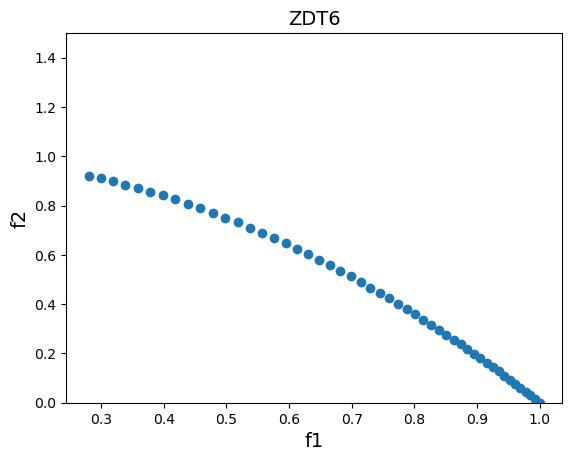

In [2]:
# --- 散布図 ---
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("f1", fontsize=14)
plt.ylabel("f2", fontsize=14)
plt.title(problem.__class__.__name__, fontsize=14)
#plt.xlim(0,1)
#plt.ylim(-1,1.5)
plt.ylim(0,1.5)

plt.scatter(F[:, 0], F[:, 1])    # 全解を表示

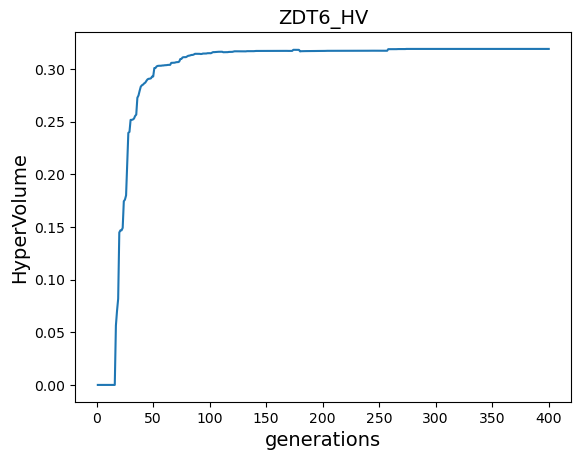

In [3]:
# --- HVと世代数のグラフ---
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("generations", fontsize=14)
plt.ylabel("HyperVolume", fontsize=14)
plt.title(f"{problem.__class__.__name__}_HV", fontsize=14)

plt.plot(range(1, len(HV_mean)+1), HV_mean)